In [1]:
import tools as tools
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import bbr_merge as bbr

import dask.dataframe as dd

# Standard imports 
import numpy as np
import pandas as pd


# OS and time packages 
import os
import time
import tqdm
import concurrent.futures
from pathlib import Path
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# HTML and text processing 
import requests
from bs4 import BeautifulSoup
import json
import re

import time
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

# Plotting 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('seaborn-whitegrid')
%matplotlib inline

plt.rc('font', size=14)             # controls default text sizes
plt.rc('axes', titlesize=18)        # fontsize of the axes title
plt.rc('axes', labelsize=18)        # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)       # fontsize of the tick labels
plt.rc('ytick', labelsize=14)       # fontsize of the tick labels
plt.rc('legend', fontsize=14)       # legend fontsize
plt.rc('figure', titlesize=20)      # fontsize of the figure title

plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots

# Filter warnings 
pd.options.mode.chained_assignment = None
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

C:\Users\JBH\AppData\Local\Temp\ipykernel_6852\2364961448.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
C:\Users\JBH\AppData\Local\Temp\ipykernel_6852\2364961448.py:39: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by

Header (state non-commercial/academic intentions)

In [2]:
header = {'name' : 'Jørgen Baun Høst',          'email' : 'pjz633@econ.ku.dk',
          'intention': 'Scrape Boliga for academic purposes'}

In [3]:
df=pd.read_parquet('data/boliga.pq')
df

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,municipalityCode,estateCode,city,groupKey,canGetVR,bfEnr,year,month,week,time_q
0,0,Ørnhøjvej 7,9240,650000,2012-12-30 23:00:00+00:00,1,Alm. Salg,2559.0552,8.0,254,...,851,626742,Nibe,NaN,True,8772902,2012,12,6,2012Q4
1,0,Sdr Lourupvej 14A,6690,250276,2012-12-30 23:00:00+00:00,1,Alm. Salg,1881.7744,4.0,133,...,561,308259,Gørding,NaN,True,5051843,2012,12,6,2012Q4
2,0,"Rådhusgade 17A, 1. tv",9670,1150000,2012-12-30 23:00:00+00:00,1,Alm. Salg,18253.9690,5.0,63,...,820,9422,Løgstør,NaN,True,5557002,2012,12,6,2012Q4
3,0,Hennetvedvej 15,5900,1600000,2012-12-30 23:00:00+00:00,1,Alm. Salg,5839.4160,11.0,274,...,482,4240,Rudkøbing,NaN,True,3075248,2012,12,6,2012Q4
4,782475,Halkærvej 15A,9240,750000,2012-12-30 23:00:00+00:00,1,Alm. Salg,7653.0610,3.0,98,...,851,626199,Nibe,NaN,True,3292315,2012,12,6,2012Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790439,0,Ny Vestergade 34A,5672,2295000,2006-11-28 23:00:00+00:00,1,Alm. Salg,39568.9650,2.0,58,...,430,1095,Broby,NaN,True,3063150,2006,11,1,2006Q4
790440,0,Vandværksvej 6,6990,1020000,2006-11-28 23:00:00+00:00,1,Alm. Salg,8500.0000,4.0,120,...,661,180229,Ulfborg,NaN,True,4504053,2006,11,1,2006Q4
790441,0,Utzonsgade 22,6000,1750000,2006-11-28 23:00:00+00:00,1,Alm. Salg,15765.7660,5.0,111,...,621,146327,Kolding,NaN,True,5680447,2006,11,1,2006Q4
790442,0,Harpelundevej 28,4900,350000,2006-11-28 23:00:00+00:00,1,Alm. Salg,2500.0000,3.0,140,...,360,17960,Nakskov,NaN,True,3103681,2006,11,1,2006Q4


In [4]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,estateCode,city,groupKey,canGetVR,bfEnr,year,month,week,time_q,geometry
0,0,Ørnhøjvej 7,9240,650000,2012-12-30 23:00:00+00:00,1,Alm. Salg,2559.0552,8.0,254,...,626742,Nibe,NaN,True,8772902,2012,12,6,2012Q4,POINT (9.60154 56.91827)
1,0,Sdr Lourupvej 14A,6690,250276,2012-12-30 23:00:00+00:00,1,Alm. Salg,1881.7744,4.0,133,...,308259,Gørding,NaN,True,5051843,2012,12,6,2012Q4,POINT (8.80146 55.47826)
2,0,"Rådhusgade 17A, 1. tv",9670,1150000,2012-12-30 23:00:00+00:00,1,Alm. Salg,18253.9690,5.0,63,...,9422,Løgstør,NaN,True,5557002,2012,12,6,2012Q4,POINT (9.25550 56.96835)
3,0,Hennetvedvej 15,5900,1600000,2012-12-30 23:00:00+00:00,1,Alm. Salg,5839.4160,11.0,274,...,4240,Rudkøbing,NaN,True,3075248,2012,12,6,2012Q4,POINT (10.73517 54.85458)
4,782475,Halkærvej 15A,9240,750000,2012-12-30 23:00:00+00:00,1,Alm. Salg,7653.0610,3.0,98,...,626199,Nibe,NaN,True,3292315,2012,12,6,2012Q4,POINT (9.61028 56.95044)


In [5]:
kommune_2006 = gpd.read_file('data/kommune_2006.shp')
kommune_2006

,objectid,navn,enhedid,fra,til,enhedtype,art,SHAPE_Leng,SHAPE_Area,geometry
0,24842.0,Københavns Kommune,120727.0,2002-12-31,2006-12-31,64.0,Kommune,154225.005507,9.028113e+07,"MULTIPOLYGON Z (((12.73424 55.70328 0.00000, 1..."
1,24843.0,Frederiksberg Kommune,120728.0,1970-04-01,2006-12-31,64.0,Kommune,13520.324243,8.709197e+06,"POLYGON Z ((12.53736 55.69661 0.00000, 12.5370..."
2,46149.0,Birkerød Kommune,120748.0,1974-01-04,2006-12-31,64.0,Kommune,35777.227097,3.366869e+07,"POLYGON Z ((12.45040 55.81888 0.00000, 12.4473..."
3,46165.0,Græsted-Gilleleje Kommune,120753.0,1972-10-01,2006-12-31,64.0,Kommune,67562.933801,1.341441e+08,"POLYGON Z ((12.39490 56.03226 0.00000, 12.3952..."
4,46190.0,Jægerspris Kommune,120759.0,1975-01-01,2006-12-31,64.0,Kommune,84485.880031,9.514108e+07,"MULTIPOLYGON Z (((11.92257 55.90000 0.00000, 1..."
...,...,...,...,...,...,...,...,...,...,...
266,46773.0,Thyborøn-Harboøre Kommune,120920.0,2002-12-31,2006-12-31,64.0,Kommune,95733.805758,3.953641e+07,"MULTIPOLYGON Z (((8.18948 56.59492 0.00000, 8...."
267,46789.0,Vinderup Kommune,120925.0,2002-12-31,2006-12-31,64.0,Kommune,109305.320681,2.175008e+08,"MULTIPOLYGON Z (((8.85937 56.39892 0.00000, 8...."
268,46793.0,Åskov Kommune,120926.0,2001-12-31,2006-12-31,64.0,Kommune,77105.236905,2.388402e+08,"POLYGON Z ((8.86526 55.89540 0.00000, 8.86505 ..."
269,46804.0,Galten Kommune,120928.0,2001-12-31,2006-12-31,64.0,Kommune,54492.128242,7.268604e+07,"POLYGON Z ((9.95809 56.13030 0.00000, 9.96044 ..."


In [6]:
regioner=gpd.read_file('data/regioner.shp')
regioner

,objectid,navn,enhedid,fra,til,enhedtype,art,SHAPE_Leng,SHAPE_Area,geometry
0,105612.0,Region Hovedstaden,118711.0,2007-01-01,9999-12-31,66.0,Region,7.371152e+05,2.563160e+09,"MULTIPOLYGON Z (((15.19733 55.31846 0.00000, 1..."
1,105615.0,Region Sjælland,118712.0,2011-11-27,9999-12-31,66.0,Region,2.196684e+06,7.216493e+09,"MULTIPOLYGON Z (((12.54857 54.95316 0.00000, 1..."
2,105616.0,Region Syddanmark,118713.0,2007-01-01,9999-12-31,66.0,Region,2.436420e+06,1.209603e+10,"MULTIPOLYGON Z (((10.68129 54.72772 0.00000, 1..."
3,105620.0,Region Midtjylland,118715.0,2011-01-01,9999-12-31,66.0,Region,2.564054e+06,1.299856e+10,"MULTIPOLYGON Z (((11.67150 56.73861 0.00000, 1..."
4,105617.0,Region Nordjylland,118714.0,2007-01-01,9999-12-31,66.0,Region,1.697705e+06,7.870127e+09,"MULTIPOLYGON Z (((10.98412 57.21880 0.00000, 1..."


In [7]:
gdf_merge=gpd.sjoin(gdf, kommune_2006, predicate='within')
cols_to_drop=['index_right',
 'objectid',
 'navn',
 'enhedid',
 'fra',
 'til',
 'enhedtype',
 'art',
 'SHAPE_Leng',
 'SHAPE_Area']
gdf_merge['kommune_old']=gdf_merge['navn']
gdf_merge=gdf_merge.drop(columns=cols_to_drop)
gdf_merge=gpd.sjoin(gdf_merge, regioner, predicate='within')
gdf_merge['region']=gdf_merge['navn']
gdf_merge=gdf_merge.drop(columns=cols_to_drop)
gdf_merge

C:\Users\JBH\AppData\Local\Temp\ipykernel_8356\4171787026.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_merge=gpd.sjoin(gdf, kommune_2006, predicate='within')
C:\Users\JBH\AppData\Local\Temp\ipykernel_8356\4171787026.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_merge=gpd.sjoin(gdf_merge, regioner, predicate='within')


,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,groupKey,canGetVR,bfEnr,year,month,week,time_q,geometry,kommune_old,region
0,0,Ørnhøjvej 7,9240,650000,2012-12-30 23:00:00+00:00,1,Alm. Salg,2559.0552,8.0,254,...,NaN,True,8772902,2012,12,6,2012Q4,POINT (9.60154 56.91827),Nibe Kommune,Region Nordjylland
4,782475,Halkærvej 15A,9240,750000,2012-12-30 23:00:00+00:00,1,Alm. Salg,7653.0610,3.0,98,...,NaN,True,3292315,2012,12,6,2012Q4,POINT (9.61028 56.95044),Nibe Kommune,Region Nordjylland
12,485013,Kirkebjergevej 16,9240,530000,2012-12-30 23:00:00+00:00,1,Alm. Salg,2760.4167,5.0,192,...,NaN,True,3292153,2012,12,6,2012Q4,POINT (9.60734 56.94492),Nibe Kommune,Region Nordjylland
637,798322,Anemonevej 1,9240,1350000,2012-12-17 23:00:00+00:00,1,Alm. Salg,10150.3760,5.0,133,...,NaN,True,5560301,2012,12,0,2012Q4,POINT (9.64762 56.98276),Nibe Kommune,Region Nordjylland
668,0,Halkærvej 54,9240,1925000,2012-12-17 23:00:00+00:00,1,Alm. Salg,21629.2130,4.0,89,...,NaN,True,8772879,2012,12,0,2012Q4,POINT (9.58058 56.92630),Nibe Kommune,Region Nordjylland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787897,0,Næblerødvej 14,4250,1450000,2006-12-20 23:00:00+00:00,1,Alm. Salg,11240.3110,5.0,129,...,NaN,True,2520858,2006,12,2,2006Q4,POINT (11.52272 55.34386),Fuglebjerg Kommune,Region Sjælland
789156,0,Kristiansholmsvej 11,4262,1350000,2006-12-11 23:00:00+00:00,1,Alm. Salg,12053.5710,3.0,112,...,NaN,True,2519685,2006,12,0,2006Q4,POINT (11.53148 55.21515),Fuglebjerg Kommune,Region Sjælland
789193,0,Krummerupvej 38,4250,1350000,2006-12-11 23:00:00+00:00,1,Alm. Salg,12053.5710,3.0,112,...,NaN,True,2528554,2006,12,0,2006Q4,POINT (11.51294 55.29964),Fuglebjerg Kommune,Region Sjælland
789940,0,Tystrupvej 3,4250,1805000,2006-12-04 23:00:00+00:00,1,Alm. Salg,18418.3670,4.0,98,...,NaN,True,2529222,2006,12,0,2006Q4,POINT (11.54201 55.37007),Fuglebjerg Kommune,Region Sjælland


In [8]:
house_price_index = pd.read_excel('data/house_price_index.xlsx')
house_price_index['time_q']=pd.PeriodIndex(house_price_index['time_q'], freq='Q')
house_price_index

,region,time_q,house_price_index
0,Region Hovedstaden,1996Q1,0.296
1,Region Hovedstaden,1996Q2,0.304
2,Region Hovedstaden,1996Q3,0.314
3,Region Hovedstaden,1996Q4,0.328
4,Region Hovedstaden,1997Q1,0.325
...,...,...,...
395,Region Nordjylland,2014Q4,1.009
396,Region Nordjylland,2015Q1,1.048
397,Region Nordjylland,2015Q2,1.059
398,Region Nordjylland,2015Q3,1.053


In [9]:
land_taxes = pd.read_excel('data/kmn_grundskyldspromille.xlsx', sheet_name='Sheet2')
land_taxes

,kommune_amt_2006,kommune_sund_2007,kommune_grundskyld2006,kommune_grundskyld2007,delta_tax,kommune_old
0,"32,10","32,00","34,00","34,00",0.00,Københavns Kommune
1,"31,20","31,20","27,00","27,00",0.00,Frederiksberg Kommune
2,"32,80","33,58","28,00","28,89",0.89,Ballerup-Måløv Kommune
3,"32,40","32,47","19,00","19,00",0.00,Brøndbyøster-Brøndbyvester Kommune
4,"32,60","32,81","25,70","25,70",0.00,Dragør Kommune
...,...,...,...,...,...,...
262,"32,60","33,13","22,00","24,14",2.14,Støvring Kommune
263,"33,10","32,66","24,00","26,22",2.22,Sæby Kommune
264,"33,00","32,70","22,00","24,82",2.82,Åbybro Kommune
265,"33,40","33,37","27,00","26,95",-0.05,Ålborg Kommune


Merge landtaxes and house prices by region

In [10]:
df_merged = pd.DataFrame(gdf_merge)
df_merged_index = pd.merge(df_merged, house_price_index, left_on=['time_q', 'region'], right_on=['time_q', 'region'])
df_merged_index = pd.merge(df_merged_index, land_taxes, left_on=['kommune_old'], right_on=['kommune_old'])

Merge BBR info

In [3]:
bbr_df = pd.read_parquet('data/bbr_merged2.pq')
bbr_df

,unitId,evaluationInfos,bbrInfoBox.lotSize,bbrInfoBox.area,bbrInfoBox.evaluationPrice,unitInfo.toiletQuantity,unitInfo.bathroomQuantity,unitInfo.propertyUnitType,bfenr
0,4f53331c-22c9-4205-9461-27ea1d70e5d9,"[{'areaSize': 3479, 'deductionSum': 0, 'evalua...",3479,254,1050000,1,1,Egentlig beboelseslejlighed,8772902
1,fe3c7851-8ed5-4a34-b37b-7f9c9a5c8651,"[{'areaSize': 1205, 'deductionSum': 0, 'evalua...",1205,98,570000,1,1,Egentlig beboelseslejlighed,3292315
2,664e5839-f106-4fe3-b996-b7e22c36a6e3,"[{'areaSize': 704, 'deductionSum': 134500, 'ev...",704,174,2200000,2,2,Egentlig beboelseslejlighed,8159601
3,ddc85eb9-d4a9-4b81-b68a-bcf30351b5c6,"[{'areaSize': 1623, 'deductionSum': 0, 'evalua...",1623,122,460000,1,1,Egentlig beboelseslejlighed,3370592
4,5b13820b-5fbc-42f9-9333-7fecc473ef2b,"[{'areaSize': 639, 'deductionSum': 0, 'evaluat...",639,195,2300000,2,2,Egentlig beboelseslejlighed,8035378
...,...,...,...,...,...,...,...,...,...
519591,6382cf23-613a-4d95-9fb0-b49611b2efc8,"[{'areaSize': 900, 'deductionSum': 126300, 'ev...",900,184,2314000,2,2,Egentlig beboelseslejlighed,8279554
519592,005ac5ce-d978-4df4-a470-7b81fdc59641,"[{'areaSize': 366, 'deductionSum': 0, 'evaluat...",366,131,510000,1,1,Egentlig beboelseslejlighed,5089623
519593,fd9ef5d3-5f58-447d-a625-31344a8f345d,"[{'areaSize': 776, 'deductionSum': 0, 'evaluat...",776,116,750000,1,1,Egentlig beboelseslejlighed,5079039
519594,67b96c26-cd54-4c5e-8a2d-1e785e353db5,"[{'areaSize': 662, 'deductionSum': 0, 'evaluat...",662,114,920000,1,1,Egentlig beboelseslejlighed,5757708


In [4]:
bbr_df.memory_usage()

Index                             128
unitId                        4156768
evaluationInfos               4156768
bbrInfoBox.lotSize            4156768
bbrInfoBox.area               4156768
bbrInfoBox.evaluationPrice    4156768
unitInfo.toiletQuantity       4156768
unitInfo.bathroomQuantity     4156768
unitInfo.propertyUnitType     4156768
bfenr                         4156768
dtype: int64

In [12]:
bbr_df['unitInfo.toiletQuantity'].describe()

count    519596.0
mean     1.634483
std      0.620244
min           0.0
25%           1.0
50%           2.0
75%           2.0
max          21.0
Name: unitInfo.toiletQuantity, dtype: Float64

In [16]:
bbr_df['bbrInfoBox.area'].describe()

count      519596.0
mean     149.232363
std       49.137931
min             0.0
25%           118.0
50%           143.0
75%           172.0
max          1205.0
Name: bbrInfoBox.area, dtype: Float64

In [17]:
bbr_df['unitInfo.propertyUnitType']=bbr_df['unitInfo.propertyUnitType'].astype('category')
bbr_df['unitInfo.bathroomQuantity']=bbr_df['unitInfo.bathroomQuantity'].astype('int8')
bbr_df['unitInfo.toiletQuantity']=bbr_df['unitInfo.toiletQuantity'].astype('int8')
bbr_df['bbrInfoBox.lotSize']=bbr_df['bbrInfoBox.lotSize'].astype('int32')
bbr_df['bbrInfoBox.area']=bbr_df['bbrInfoBox.area'].astype('int16')
bbr_df.memory_usage()

Index                             128
unitId                        4156768
evaluationInfos               4156768
bbrInfoBox.lotSize            2078384
bbrInfoBox.area               1039192
bbrInfoBox.evaluationPrice    4676364
unitInfo.toiletQuantity        519596
unitInfo.bathroomQuantity      519596
unitInfo.propertyUnitType      519728
bfenr                         4676364
dtype: int64

In [19]:
bbr_df=bbr_df[['unitId', 'evaluationInfos', 'bbrInfoBox.lotSize', 'bbrInfoBox.area', 'unitInfo.toiletQuantity', 'unitInfo.bathroomQuantity', 'unitInfo.propertyUnitType']]
bbr_df.to_parquet('data/bbr_merged.pq')

In [6]:
bbr_df.memory_usage()

Index                             128
unitId                        4156768
evaluationInfos               4156768
bbrInfoBox.lotSize            4676364
bbrInfoBox.area               4676364
bbrInfoBox.evaluationPrice    4676364
unitInfo.toiletQuantity       4676364
unitInfo.bathroomQuantity     4676364
unitInfo.propertyUnitType     4156768
bfenr                         4676364
dtype: int64

In [7]:
bbr_df.dtypes

unitId                        string
evaluationInfos               object
bbrInfoBox.lotSize             Int64
bbrInfoBox.area                Int64
bbrInfoBox.evaluationPrice     Int64
unitInfo.toiletQuantity        Int64
unitInfo.bathroomQuantity      Int64
unitInfo.propertyUnitType     string
bfenr                          Int64
dtype: object

In [19]:
bbr_df['unitInfo.bathroomQuantity']=bbr_df['unitInfo.bathroomQuantity'].astype('Int8')
bbr_df['unitInfo.toiletQuantity']=bbr_df['unitInfo.toiletQuantity'].astype('Int8')

In [22]:
bbr_df['bbrInfoBox.area']=bbr_df['bbrInfoBox.area'].astype('int8')

In [33]:
bbr_df['bbrInfoBox.evaluationPrice']=bbr_df['bbrInfoBox.evaluationPrice'].astype('int16')
bbr_df['bbrInfoBox.lotSize']=bbr_df['bbrInfoBox.lotSize'].astype('int16')
bbr_df['bfenr']=bbr_df['bfenr'].astype('int32')

In [6]:
bbr_df['unitInfo.propertyUnitType']=bbr_df['unitInfo.propertyUnitType'].astype('category')

In [12]:
bbr_df['evaluationInfos'][0][0]

{'areaSize': 3479,
 'deductionSum': 0,
 'evaluationYear': 2022,
 'landValue': 58300,
 'lastChange': '2022-10-01T00:00:00',
 'propertyValue': 1050000,
 'propertyValueArea': 1050000,
 'rebuildYear': 1980,
 'residentialUnits': 1,
 'usage': 'Beboelsesejendom'}

In [15]:
df_merged_index

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,time_q,geometry,kommune_old,region,house_price_index,kommune_amt_2006,kommune_sund_2007,kommune_grundskyld2006,kommune_grundskyld2007,delta_tax
0,0,Ørnhøjvej 7,9240,650000,2012-12-30 23:00:00+00:00,1,Alm. Salg,2559.0552,8.0,254,...,2012Q4,POINT (9.60154 56.91827),Nibe Kommune,Region Nordjylland,0.983,"33,40","33,37","21,00","26,95",5.95
1,782475,Halkærvej 15A,9240,750000,2012-12-30 23:00:00+00:00,1,Alm. Salg,7653.0610,3.0,98,...,2012Q4,POINT (9.61028 56.95044),Nibe Kommune,Region Nordjylland,0.983,"33,40","33,37","21,00","26,95",5.95
2,485013,Kirkebjergevej 16,9240,530000,2012-12-30 23:00:00+00:00,1,Alm. Salg,2760.4167,5.0,192,...,2012Q4,POINT (9.60734 56.94492),Nibe Kommune,Region Nordjylland,0.983,"33,40","33,37","21,00","26,95",5.95
3,798322,Anemonevej 1,9240,1350000,2012-12-17 23:00:00+00:00,1,Alm. Salg,10150.3760,5.0,133,...,2012Q4,POINT (9.64762 56.98276),Nibe Kommune,Region Nordjylland,0.983,"33,40","33,37","21,00","26,95",5.95
4,0,Halkærvej 54,9240,1925000,2012-12-17 23:00:00+00:00,1,Alm. Salg,21629.2130,4.0,89,...,2012Q4,POINT (9.58058 56.92630),Nibe Kommune,Region Nordjylland,0.983,"33,40","33,37","21,00","26,95",5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782349,0,Nyvej 39,4262,1075000,2007-01-12 23:00:00+00:00,1,Alm. Salg,10141.5100,4.0,106,...,2007Q1,POINT (11.52596 55.26360),Fuglebjerg Kommune,Region Sjælland,1.051,"34,90","32,70","25,00","22,00",-3.00
782350,19967,Nyvej 9,4250,1380000,2007-01-11 23:00:00+00:00,1,Alm. Salg,15333.3330,4.0,90,...,2007Q1,POINT (11.54138 55.30561),Fuglebjerg Kommune,Region Sjælland,1.051,"34,90","32,70","25,00","22,00",-3.00
782351,0,Sorøvej 5,4250,900000,2007-01-09 23:00:00+00:00,1,Alm. Salg,6293.7060,6.0,143,...,2007Q1,POINT (11.54710 55.30669),Fuglebjerg Kommune,Region Sjælland,1.051,"34,90","32,70","25,00","22,00",-3.00
782352,19995,Skælskørvej 112,4261,1275000,2007-01-08 23:00:00+00:00,1,Alm. Salg,10365.8540,3.0,123,...,2007Q1,POINT (11.46541 55.30009),Fuglebjerg Kommune,Region Sjælland,1.051,"34,90","32,70","25,00","22,00",-3.00


In [16]:
df_merged_index['real_price']=df_merged_index['price']/df_merged_index['house_price_index']
df_merged_index['real_sqmPrice']=df_merged_index['sqmPrice']/df_merged_index['house_price_index']

In [29]:
list_of_guids = list(df_merged_index['guid'].unique())
list_of_guids

['4F53331C-22C9-4205-9461-27EA1D70E5D9',
 'FE3C7851-8ED5-4A34-B37B-7F9C9A5C8651',
 '152E28A9-5339-401B-ABBE-627BBC50D4F6',
 '6309D1BA-35A4-4776-9EA6-07F7C3312AE5',
 'F85E5FC8-CC5F-494E-8C33-112A2AA8596D',
 '017ED6DC-CFAA-4B74-8EFC-68C185AD0CEB',
 '1D6AD63A-A5EC-4320-A338-F4C426851CAC',
 '60D1B4F9-5FF7-4CE2-800A-7AF196BC97E4',
 '95E8C645-B752-4059-9A8D-2FE9DD1D7659',
 'C963BE1A-5767-4A9C-96EA-308960EBE358',
 '664E5839-F106-4FE3-B996-B7E22C36A6E3',
 'AEC90E33-9B3B-4AAC-899D-39D62B22A1BA',
 'C756440E-EF07-4C12-924E-BE4A4408158A',
 '46A4359A-8B6F-4A85-A552-5F2C03CC6F14',
 '84354396-6F66-4646-AD78-1A1A2A3C833E',
 '21D71CD0-0A62-4B3A-9A93-72616E71CB9D',
 'D393C6E9-7A08-4BD7-ACE8-BEFC3FB788C5',
 '2131CC23-64EB-448E-9C8A-053C21FBFFE0',
 '7D305E2D-9280-4108-BFC4-C305F231EA9A',
 'D799299D-2C23-434D-9EDC-B06B84454DAA',
 '683B848F-C191-4059-A27E-E7946F6E31EE',
 '0F64BDDE-D20B-4DB1-A674-686746B53C10',
 'AD7D5F86-53EF-4D6A-82EA-4C16CAE3EB02',
 'A1DECA29-DD8D-46B3-B108-9D23B9719943',
 '63E6AF05-07BF-

In [32]:
# list_of_bbr_urls = []

# for i,guid in enumerate(list_of_guids):
#     bbr_url = f'https://api.boliga.dk/api/v2/bbrinfo/bbr?id={guid}'
#     list_of_bbr_urls.append(bbr_url)

# pd.DataFrame(list_of_bbr_urls, columns=['bbr_url']).to_parquet('data/bbr_ids_scraper.pq')

In [18]:
%%time
bbr_url = 'https://api.boliga.dk/api/v2/bbrinfo/bbr?id=4771A8BE-615B-4571-96B6-0C7C991C0021'
json_=tools.get_json(url=bbr_url, header=header)
json_

CPU times: total: 46.9 ms
Wall time: 616 ms


{'unitId': '4771a8be-615b-4571-96b6-0c7c991c0021',
 'isSalesValid': False,
 'isActive': False,
 'addressString': 'Molestien 10, st. 26',
 'gadeString': 'Molestien',
 'hus_nr': '10',
 'etagebetegn': 'st',
 'side_Doernr': '26',
 'zipString': '2450 København SV',
 'zipCodeString': '2450',
 'imageUrl': '',
 'isApartment': False,
 'propertyType': 3,
 'municipalityCode': 101,
 'esrCode': 15587,
 'lat': 55.64392,
 'lon': 12.542426,
 'isBlocked': False,
 'isInSalesAgent': False,
 'isInWatchlist': False,
 'isCoop': False,
 'addressFloor': '0',
 'watchlistNote': None,
 'ejendomsværdiskat': 0.0,
 'grundskyld': 619480.0,
 'canGetVR': True,
 'propertyTypeName': 'Ejerlejlighed',
 'bbrInfoBox': {'monthlyPropertyTax': 51623.0,
  'lotSize': 12997,
  'roomsQuantity': 3,
  'area': 57,
  'areaRecorded': 0,
  'evaluationPrice': 18220000,
  'basementSize': 1973},
 'relatedImages': None,
 'buildingInfo': {'buildingNumber': 2,
  'buildingUsage': 'Etagebolig-bygning, flerfamiliehus eller to-familiehus',
  'con

In [26]:
json_

{'unitId': '4771a8be-615b-4571-96b6-0c7c991c0021',
 'isSalesValid': False,
 'isActive': False,
 'addressString': 'Molestien 10, st. 26',
 'gadeString': 'Molestien',
 'hus_nr': '10',
 'etagebetegn': 'st',
 'side_Doernr': '26',
 'zipString': '2450 København SV',
 'zipCodeString': '2450',
 'imageUrl': '',
 'isApartment': False,
 'propertyType': 3,
 'municipalityCode': 101,
 'esrCode': 15587,
 'lat': 55.64392,
 'lon': 12.542426,
 'isBlocked': False,
 'isInSalesAgent': False,
 'isInWatchlist': False,
 'isCoop': False,
 'addressFloor': '0',
 'watchlistNote': None,
 'ejendomsværdiskat': 0.0,
 'grundskyld': 619480.0,
 'canGetVR': True,
 'propertyTypeName': 'Ejerlejlighed',
 'bbrInfoBox': {'monthlyPropertyTax': 51623.0,
  'lotSize': 12997,
  'roomsQuantity': 3,
  'area': 57,
  'areaRecorded': 0,
  'evaluationPrice': 18220000,
  'basementSize': 1973},
 'relatedImages': None,
 'buildingInfo': {'buildingNumber': 2,
  'buildingUsage': 'Etagebolig-bygning, flerfamiliehus eller to-familiehus',
  'con

In [28]:
pd.DataFrame(json_['evaluationInfos'])

,evaluationYear,lastChange,propertyValue,landValue,deductionSum,usage,residentialUnits,propertyValueArea,rebuildYear,areaSize
0,2022,2022-10-01T00:00:00,18220000,18220000,0,"Ubebygget areal (Ikke landbrugsareal), forskel...",0,18220000,0,15233
1,2021,2021-10-01T00:00:00,18220000,18220000,0,"Ubebygget areal (Ikke landbrugsareal), forskel...",0,18220000,0,15233
2,2019,2019-10-01T00:00:00,18220000,18220000,0,"Ubebygget areal (Ikke landbrugsareal), forskel...",0,18220000,0,15233
3,2018,2018-10-01T00:00:00,18220000,18220000,0,"Ubebygget areal (Ikke landbrugsareal), forskel...",0,18220000,0,15233
4,2017,2017-10-01T00:00:00,18220000,18220000,0,"Ubebygget areal (Ikke landbrugsareal), forskel...",0,18220000,0,15233
5,2016,2016-10-01T00:00:00,18220000,18220000,0,"Ubebygget areal (Ikke landbrugsareal), forskel...",0,18220000,0,15233
6,2015,2015-10-01T00:00:00,18220000,18220000,0,"Ubebygget areal (Ikke landbrugsareal), forskel...",0,18220000,0,15233


In [42]:
def land_tax_change07(value):
    if value > 0:
        return "Higher"
    elif value < 0:
        return "Lower"
    else:
        return "Unchanged"
df_merged_index['tax_change_reform'] = df_merged_index.apply(lambda row: land_tax_change07(row['delta_tax']), axis = 1)
df_merged_index['tax_change_reform']=df_merged_index['tax_change_reform'].astype('category')

In [46]:
df_merged_index2 = df_merged_index[(df_merged_index['size']>100) & (df_merged_index['size']<250)]
df_merged_index2

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,region,house_price_index,kommune_amt_2006,kommune_sund_2007,kommune_grundskyld2006,kommune_grundskyld2007,delta_tax,real_price,real_sqmPrice,tax_change_reform
2,485013,Kirkebjergevej 16,9240,530000,2012-12-30 23:00:00+00:00,1,Alm. Salg,2760.4167,5.0,192,...,Region Nordjylland,0.983,"33,40","33,37","21,00","26,95",5.95,5.391658e+05,2808.155341,Higher
3,798322,Anemonevej 1,9240,1350000,2012-12-17 23:00:00+00:00,1,Alm. Salg,10150.3760,5.0,133,...,Region Nordjylland,0.983,"33,40","33,37","21,00","26,95",5.95,1.373347e+06,10325.916582,Higher
5,766016,Nørregade 20,9240,1360000,2012-12-16 23:00:00+00:00,1,Alm. Salg,11239.6690,4.0,121,...,Region Nordjylland,0.983,"33,40","33,37","21,00","26,95",5.95,1.383520e+06,11434.047813,Higher
6,763465,Ll Nørregade 7,9240,1890000,2012-12-14 23:00:00+00:00,1,Alm. Salg,12945.2050,4.0,146,...,Region Nordjylland,0.983,"33,40","33,37","21,00","26,95",5.95,1.922686e+06,13169.079349,Higher
7,463647,Villavej 42,9240,1050000,2012-12-10 23:00:00+00:00,1,Alm. Salg,6034.4830,6.0,174,...,Region Nordjylland,0.983,"33,40","33,37","21,00","26,95",5.95,1.068159e+06,6138.843337,Higher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782348,19971,Haldagermaglevej 15,4250,1275000,2007-01-14 23:00:00+00:00,1,Alm. Salg,11184.2110,4.0,114,...,Region Sjælland,1.051,"34,90","32,70","25,00","22,00",-3.00,1.213130e+06,10641.494767,Lower
782349,0,Nyvej 39,4262,1075000,2007-01-12 23:00:00+00:00,1,Alm. Salg,10141.5100,4.0,106,...,Region Sjælland,1.051,"34,90","32,70","25,00","22,00",-3.00,1.022835e+06,9649.391056,Lower
782351,0,Sorøvej 5,4250,900000,2007-01-09 23:00:00+00:00,1,Alm. Salg,6293.7060,6.0,143,...,Region Sjælland,1.051,"34,90","32,70","25,00","22,00",-3.00,8.563273e+05,5988.302569,Lower
782352,19995,Skælskørvej 112,4261,1275000,2007-01-08 23:00:00+00:00,1,Alm. Salg,10365.8540,3.0,123,...,Region Sjælland,1.051,"34,90","32,70","25,00","22,00",-3.00,1.213130e+06,9862.848716,Lower


In [52]:
temp_agg=df_merged_index2.groupby(['time_q', 'tax_change_reform']).mean()
temp_agg

C:\Users\JBH\AppData\Local\Temp\ipykernel_24900\3360601137.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_agg=df_merged_index2.groupby(['time_q', 'tax_change_reform']).mean()


estateId      zipCode         price  \
time_q tax_change_reform                                             
1996Q1 Higher                  0.000000  6421.677603  6.739154e+05   
       Lower                   0.000000  6805.935774  6.769706e+05   
       Unchanged               0.000000  3664.315969  9.977398e+05   
1996Q2 Higher                  0.000000  6438.495890  6.942306e+05   
       Lower                   0.000000  6759.700677  7.088900e+05   
...                                 ...          ...           ...   
2012Q3 Lower              576436.977444  6786.553315  1.566460e+06   
       Unchanged          638600.130533  3472.381385  3.075490e+06   
2012Q4 Higher             571636.808837  6234.327442  1.545094e+06   
       Lower              587034.421943  6791.364923  1.659080e+06   
       Unchanged          630504.919481  3437.802597  3.024205e+06   

                          propertyType      sqmPrice     rooms        size  \
time_q tax_change_reform                                                     
1996Q1 Higher                      1.0   4450.982586  5.087270  153.099519   
       Lower                       1.0   4521.352602  5.104442  152.823129   
       Unchanged                   1.0   6632.220542  5.155423  151.334757   
1996Q2 Higher                      1.0   4602.671348  5.082023  153.193352   
       Lower                       1.0   4712.975983  5.062037  151.997166   
...                                ...           ...       ...         ...   
2012Q3 Lower                       1.0  10435.220668  4.944976  149.144224   
       Unchanged                   1.0  20130.247913  5.178207  151.397276   
2012Q4 Higher                      1.0  10280.484462  4.952558  149.934884   
       Lower                       1.0  11080.482536  4.977979  150.562721   
       Unchanged                   1.0  19830.685014  5.227273  150.944156   

                            buildYear   latitude  longitude  ...  groupKey  \
time_q tax_change_reform                                     ...             
1996Q1 Higher             1948.940070  55.940878  10.353551  ...  6.083333   
       Lower              1945.852541  55.904551  10.225492  ...  6.037037   
       Unchanged          1944.871904  55.692799  12.024825  ...  5.714286   
1996Q2 Higher             1948.008578  55.949549  10.408888  ...  5.343750   
       Lower              1948.982837  55.869397  10.259935  ...  5.320000   
...                               ...        ...        ...  ...       ...   
2012Q3 Lower              1946.701982  55.904900  10.262439  ...  2.200000   
       Unchanged          1940.098751  55.688511  12.126408  ...  3.000000   
2012Q4 Higher             1950.007907  55.925855  10.499223  ...  4.000000   
       Lower              1947.259143  55.894841  10.253368  ...  5.411765   
       Unchanged          1939.242857  55.691173  12.162027  ...  4.000000   

                          canGetVR         bfEnr    year      month      week  \
time_q tax_change_reform                                                        
1996Q1 Higher             1.000000  4.326799e+06  1996.0   2.145232  2.865923   
       Lower              0.999600  4.543150e+06  1996.0   2.117047  2.833333   
       Unchanged          1.000000  3.753020e+06  1996.0   2.110162  3.106746   
1996Q2 Higher             1.000000  4.366389e+06  1996.0   5.055397  2.845783   
       Lower              0.999843  4.599928e+06  1996.0   5.053692  2.786490   
...                            ...           ...     ...        ...       ...   
2012Q3 Lower              1.000000  5.051093e+06  2012.0   8.037252  2.631921   
       Unchanged          1.000000  5.385870e+06  2012.0   8.032917  2.703746   
2012Q4 Higher             1.000000  4.990702e+06  2012.0  10.908837  2.520465   
       Lower              0.999607  5.091467e+06  2012.0  10.860401  2.533228   
       Unchanged          0.998701  5.051857e+06  2012.0  10.887013  2.681818   

                          house_pric

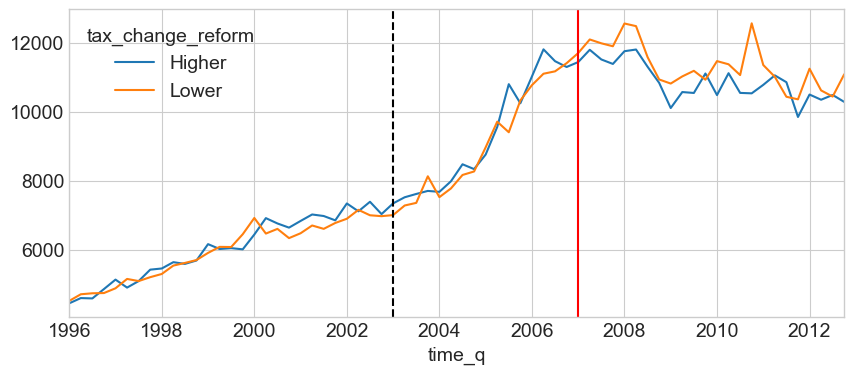

In [64]:
temp_agg_high_low = temp_agg.unstack()
plot=temp_agg_high_low['sqmPrice'][['Higher', 'Lower']].plot()
plot.axvline(x=pd.Period('2007Q1', freq='Q'), color='r')
plot.axvline(x=pd.Period('2003Q1', freq='Q'), color='k', linestyle='--')

In [37]:
after=list(df_merged_index['kommune_old'].unique())
before=list(kommune_2006['navn'].unique())

In [38]:
missing = [item for item in before if item not in after]
missing

['Christiansø',
 'Arden Kommune',
 'Herstederne Kommune',
 'Hadsund Kommune',
 'Hobro Kommune']